**Download** (right-click, save target as ...) this page as a jupyterlab notebook [ES-29](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29-TH.ipynb)

___

# <font color=darkblue>Laboratory 29: Multiple Regression </font>

**Medrano, Giovanni**

**R11521018**


ENGR 1330 Laboratory 29 - In Lab

___


## Background

Download the data set [ca_housing.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/ca_housing.csv) and describe its contents (no not the describe function, but words - what does it appear to contain)

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns 
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

Get the datafile

In [2]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/ca_housing.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('ca_housing.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

Read the datafile into a dataframe

In [3]:
housing = pd.read_csv('ca_housing.csv')
housing.describe() # verify the read

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. Count the number of missing values for each feature using isnull() .

In [4]:
housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
AveHouseVal    0
dtype: int64

It appears that all values have non-null entries, so no cleaning necessary.

### Exploratory Data Analysis

Plot the distribution of the target variable AveHouseVal depending on Latitude and Longitude. The code below should get the following figure (assuming you named your dataframe "housing")

<!--![](calimap.png)-->

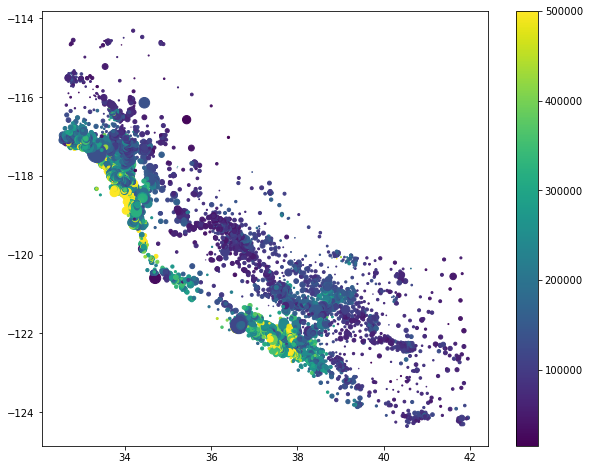

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(housing['Latitude'], housing['Longitude'], c=housing['AveHouseVal'], s=housing['Population']/100)
plt.colorbar()

So it sort of looks like Callyfornia, notice the high value homes are along the coast, and get cheaper as one moves inland. Aslo note we are not correctly projecting the Lat-Lon values, so we should not use our script as a GIS-type tool just yet.

#### Correlation map 

Next, we create a correlation matrix that measures the linear relationships between the variables.

The script below should produce a correlation map that prints the off-diagional correlation matrix terms, and color codes them/

<AxesSubplot:>

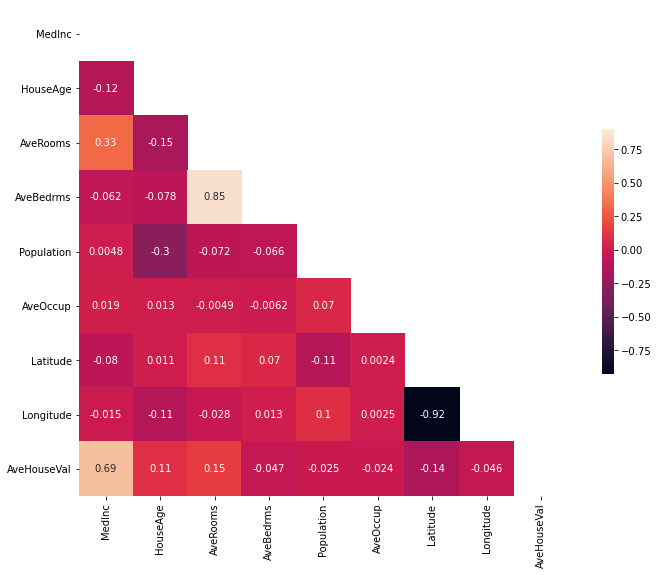

In [6]:
corrmat = housing.corr()
plt.subplots(figsize=(12,9))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, mask=mask, cbar_kws={"shrink": .5})

#### Build a Multiple-variable Model


The script below uses all the variables (its a dumb model but illustrates the syntax and package warnings we can use to improve the model)

In [8]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('AveHouseVal ~ MedInc + AveRooms + HouseAge + AveRooms + Latitude + Longitude + AveOccup + AveRooms + AveBedrms + Population ', data=housing) # model object constructor syntax
model = model.fit()
pred = model.predict()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AveHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:39:34   Log-Likelihood:            -2.6025e+05
No. Observations:               20640   AIC:                         5.205e+05
Df Residuals:                   20631   BIC:                         5.206e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.694e+06   6.59e+04    -56.067      0.0

### Select Useable Variables

To fit a linear regression model, we want to select those features that have a high correlation with our dependent variable **AveHouseVal**. 

By looking at the correlation matrix we can see that MediaInc has a strong positive correlation with AverageHouseVal (0.69). The other two variables with highest correlation are HouseAge and AveRooms.

We should drop population as it could include zero (and its coefficient is already small). 
An important point when selecting features for a linear regression model is to check for multicollinearity. 
For example, the features Latitude and Longitude have 0.92 correlation with each other, so we should **not** include **both** of them simultaneously in our regression model. 

Because the correlation between the variables MediaInc , HouseAve and AveRooms is not high, yet they have good correlation with **AveHouseVal** , we consider those three variables for our regression model.

<hr>

## Exercise 1
Build a model to predict  **AveHouseVal** based on 

- **MediaInc** 
- **HouseAge**
- **AveRooms** 

1. Report the equation of the model.
2. Produce a histogram of **AveHouseVal**.
3. Produce a histogram of the residuals.
4. What is the mean value of the residuals?
5. Do the residuals seem to be normally distributed?  How will you assess?
6. Are the residuals homoscedastic? (Yep you're gonna have to look that up)

<AxesSubplot:>

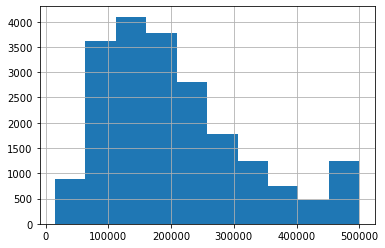

In [27]:
import statsmodels.api as sm
(housing['AveHouseVal']).hist()

[ 0.39635562 -0.36582416 -0.44969507 ...  0.00653609 -0.19629183
 -0.38516945]


(array([1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 8.000e+00, 7.200e+01,
        7.480e+02, 7.139e+03, 7.601e+03, 3.138e+03, 1.169e+03, 4.830e+02,
        2.210e+02, 4.700e+01, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-7.4433225 , -6.5641189 , -5.6849153 , -4.80571169, -3.92650809,
        -3.04730448, -2.16810088, -1.28889727, -0.40969367,  0.46950993,
         1.34871354,  2.22791714,  3.10712075,  3.98632435,  4.86552795,
         5.74473156,  6.62393516,  7.50313877,  8.38234237,  9.26154598,
        10.14074958]),
 <BarContainer object of 20 artists>)

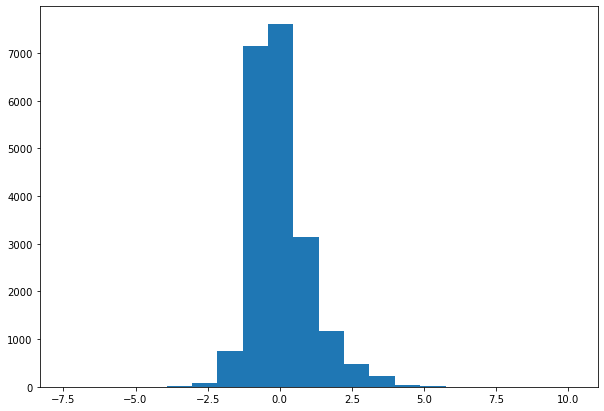

In [28]:
model = smf.ols('AveHouseVal ~ MedInc + HouseAge + AveRooms', data = housing)
model = model.fit()
slope = model.params[1]
Rsquare = model.rsquared
intercept = model.params[0]
RMSE = math.sqrt(model.mse_total)
infl = model.get_influence()
res = infl.resid_studentized_internal
print(res)
p = res
print('===============================')

fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(p, bins = 20)

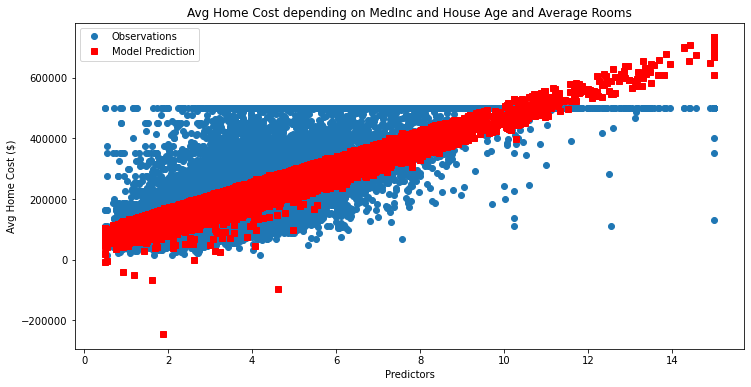

In [32]:
hVal = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(housing['MedInc'], housing['AveHouseVal'], 'o')          
plt.plot(housing['MedInc'], hVal, marker = 's' ,color ='r', linewidth=0)  
plt.xlabel('Predictors')
plt.ylabel('Avg Home Cost ($)')
plt.legend(['Observations','Model Prediction'])
plt.title('Avg Home Cost depending on MedInc and House Age and Average Rooms')

plt.show()

# As we can see the observations are not homoscendastic, whilst the prediction is

<hr>

## Exercise 2

Build a plot of AveHouseValue on the x-axis, and the predicted HouseValue on the y-axis.  
Add an equal value line (i.e. [10000,500000],[10000,500000] in a second plot call).

Something like:

```
# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(housing['AveHouseVal'], pred, 'o')           # scatter plot actual vs model
plt.plot([10000,500000],[10000,500000] , 'r', linewidth=2)   # equal value line
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Need a title')
plt.show();
```

If your model estimates a value of \$200,000 or less is your model over- or under-predicting?

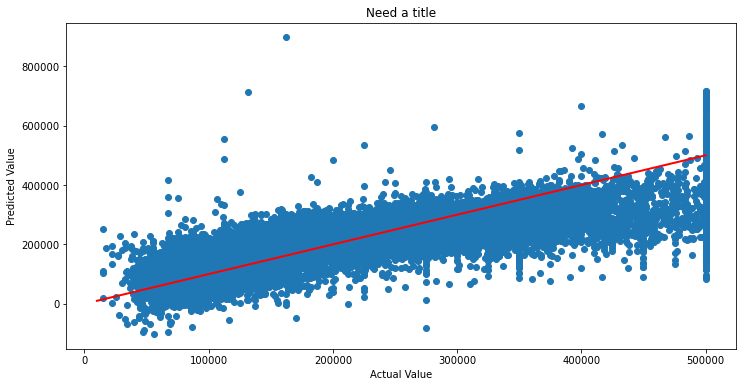

In [33]:


plt.figure(figsize=(12, 6))
plt.plot(housing['AveHouseVal'], pred, 'o')          
plt.plot([10000,500000],[10000,500000] , 'r', linewidth=2)  
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Need a title')
plt.show();

# According to the model it demonstrates that it is overpredicting